# Modelling 3-body particle decays on the Dalitz plot

In this assignment you will generate and then fit 2 interfering decays of a $D_s^+$ meson. The $D_s^+$ meson constitutes a bound state of a Charm and anti-Strange quark,  $c\bar{s}$.

The decay of a $D_s^+$ meson to 2 kaons and a pion, written as

$$D_s^+ \rightarrow K^+ K^- \pi^+$$

can proceed through different intermediate particles known as resonances. Consider 2 decay paths involving resonances $A$ and $B$

$$D_s^+ \rightarrow A(\rightarrow K^+ K^-) \pi^+$$
$$D_s^+ \rightarrow K^+ B(\rightarrow K^- \pi^+)$$

In the first decay a $D_s^+$ meson decays to resonance $A$ and a $\pi^+$, resonance $A$ then subseqently decays to a $K^+$ and a $K^-$. In the second decay a $D_s^+$ meson decays to resonance $B$ and a $K^+$, resonance $B$ then subseqently decays to a $K^-$ and a $\pi^+$. 

Because the initial and final states of the 2 decay paths are the same they exhibit quantum mechanical interference effects. This is similar to Young's double slit experiment where light taking two indistinguishable paths makes interference effects on a screen.

## The Dalitz plot

$D_s$ mesons, kaons and pions are known as pseudoscalar particles and have 0 spin. A 3-body decay with pseudoscalar particles in the intial and final state can be fully described by only 2 independent variables, ie. decay *events* can be illustrated on a 2-D plot. If this plot has axes equal to the invariant mass squared of different pairs of the final state particles it is known as a Dalitz plot.

A Dalitz plot is used to illustrate 3-body decays, showing the resonances involved in a decay and any interference effects between them. Below (left) is a "toy" (unphysical/made-up) example for the $D_s^+ \rightarrow K^+ K^- \pi^+$ decay. On the x-axis is the invariant mass squared of the $K^+ K^-$ system, $m^2_{KK}$, and on the y-axis the invariant mass squared of the $K^- \pi^+$ system, $m^2_{K\pi}$. From it we can see

* A resonance with mass $\approx \sqrt{1.2}$ $\mathrm{GeV}/c^2$ that decays into $K^- \pi^+$ 
* A resonance with mass $\approx \sqrt{1.5}$ $\mathrm{GeV}/c^2$ that decays into $K^+ K^-$ 
* Destructive interference where the resonances overlap in the Dalitz plot indicated by a reduced event density

This is what we will simulate and fit in this project.

Below (right) is an illustration of the kinematic boundaries of the Dalitz plot, enforced via conservation of energy and momentum, giving Dalitz plots their distinctive shape. Here the decay $D_s^+ \rightarrow K^+ K^- \pi^+$ is notated as $M^+ \rightarrow 1^+ 2^+ 3^-$ and natural units are used where $c=1$ (hence the units on the axis labels). There is a very nice [Quantum Diaries entry](http://www.quantumdiaries.org/2012/11/02/a-dalitz-what-now/) explaining Dalitz plots. Note that we will be considering toy $D_s^+ \rightarrow K^+ K^- \pi^+$ resonances and will not be considering the spin of resonances.


<img src="https://gitlab.cern.ch/uploads/-/system/personal_snippet/2943/63fc8ba8509fe49173d12bb2afa9d2e8/Dalitz.png" width="475" height="400" />
<img src="http://www.quantumdiaries.org/wp-content/uploads/2012/11/dalits_boundary.png" width="475" height="400" />





### Task 1

Write a function(s) that generates $n$ decay events of $D_s^+ \rightarrow K^+ K^- \pi^+$ that are uniformly distributed over the allowed phasespace. The parameter $n$ should be an argument of your function. Plot these events on a Dalitz plot for $n=100000$ using a `hist2d` with 300x300 bins. 

* "Allowed phasespace" here refers to the kinematically allowed region of the Dalitz plot, ie. the area shown in the example Dalitz plots above. 

* Use the same units ($\mathrm{GeV}^2/c^4$) and axes as in the example Dalitz plot on the left. To ease communication and make the code clearer we will use $d \rightarrow a b c$ notation for the decay such that you will be working with the variables:

  * `m2ab` - the invariant mass squared of the $K^+ K^-$ system 
  * `m2bc` - the invariant mass squared of the $K^- \pi^+$ system
  * `md, ma, mb, mc` - the masses of the decaying $D_s$ meson and the 3 decay products respectively

* The masses you should use are

  * `m_dmeson=1.97`
  * `m_kaon=0.498`
  * `m_pion=0.135`


Hint: Use the accept-reject Monte Carlo method with NumPy functions. You only need to generate `m2ab` and `m2bc` values for the events. The range of `m2bc` values kinematically allowed given a `m2ab` value can be found in eqn 49.23a and 49.23b of the [PDG review](https://pdg.lbl.gov/2023/reviews/rpp2023-rev-kinematics.pdf) (note that the PDG uses $M^+ \rightarrow 1^+ 2^+ 3^-$ notation)

**Marking:**
* Function(s) that generates events within allowed phasespace **[2]**
* Events are uniformly distributed over allowed phasespace **[1]**
* $n$ events are returned by function(s) where $n$ is an argument of the function ie. the inefficiency of the accept-reject method is handled **[1]**
* Suitable plot with correct distribution and axis labels **[1]**


### Task 2

The amplitude of an isolated resonance decaying into particles $a$ and $b$ can be described by the complex Breit Wigner function

$$A=\frac{1}{(m_{res}^2-m2ab) - i(m_{res} \times \Gamma_{res})}$$

where $m_{res}$ and $\Gamma_{res}$ are the mass and width of the resonance and `m2ab` is the invariant mass of the $a$ and $b$ two particle system as above (this is a simplification, in reality there are also spin and form factors).

What we observe on the Dalitz plot is not the amplitude but the amplitude squared.

Write a function that generates $n=5000$ $D_s^+ \rightarrow K^+ K^- \pi^+$ events decaying through a resonance in the $K^+ K^-$ system and show these events on a Dalitz plot along with 10000 "phasespace" events from task 1 - these events act like "background" to your $D_s^+ \rightarrow K^+ K^- \pi^+$ signal events. The resonance should have a mass of 1.3 $\mathrm{GeV}/c^2$ and a width of 0.015 $\mathrm{GeV}/c^2$.

You should see a single, vertical band.

Hint: Use your generator from task 1 to generate kinematically allowed events and use a basic rejection sampling method (look up the [von Neumann method](https://xuwd11.github.io/am207/wiki/rejectionsampling.html)) to generate the Breit Wigner distribution.

**Marking:**

* Function(s) that generates events according to a Breit Wigner squared distribution **[2]**
* Exactly $n$ events are returned by the function(s) where $n$ is an argument of the function **[1]**
* Plot shows correct distribution with axis labels **[1]**

### Task 3

Create a resonance in the $K^+ K^-$ system with mass 1.3 $\mathrm{GeV}/c^2$ and width 0.015 $\mathrm{GeV}/c^2$ as above and a resonance in the $K^- \pi^+$ system with mass 1.05 $\mathrm{GeV}/c^2$ and width 0.015 $\mathrm{GeV}/c^2$ that interfere with each other.

The amplitudes of the two interfering decay paths, $A_1$ and $A_2$, add coherently to give the total amplitude for the decay. Each decay path is weighted by a complex coefficient

$$A_{TOT}=a_1A_1 + a_2A_2$$

where $a_i=r_ie^{i\theta_i}$. We only care about the relative weighting so you can set the coefficient of the resonance in the $K^+ K^-$ system to $a_1=1$, ie. $r_1=1$ and $\theta_1=0$. Remember the observable on the Dalitz plot is $A_{TOT}^2$.

Show three Dalitz plots where $n=5000$ and where $r_2=1.0$ for
* $\theta_2=0$, 
* $\theta_2=\pi$, 
* $\theta_2=\pi/2$ 

along with 10000 phasespace events from task 1. 

Observe which $\theta$ value corresponds to constructive and which to destructive interference between the decay paths.

Hint: Use the basic rejection sampling method from task 2 in 2D

**Marking:**

* Function that generates events according to distribution of interfering Breit Wigners **[2]**
* Generation of 3 samples with required $\theta_2$ values **[1]**
* Plots showing correct distribution and interference effects with axis labels **[1]**

### Task 4a

Fit the 2D Dalitz plot distribution that you have generated using $\theta_2=\pi$ and try to get back the original values of $r_2(=1)$ and $\theta_2(=\pi)$.

Fit your distribution from task 3 without background events ie. fit the sample of $n=5000$ $D_s^+ \rightarrow K^+ K^- \pi^+$ events WITHOUT the 10000 phasespace events added. 

Use a Log-Likelihood fit to achieve this. In a Log-Likelihood fit we minimise the negative of the logarithm of the "Likelihood" value. The metric to minimise is

$$ - Log\mathcal{L} = - \sum_{i=1}^n Log(f(x_i, \phi))$$

where the sum is over the $n$ events we are fitting to at positions $x_i$ on the Dalitz plot. $f$ is the function from task 3 **normalised** and $\phi$ represents the parameters we are fitting for, here $r_2$ and $\theta_2$.

Hint:
* The SciPy function `curve_fit` is unsuitable for this task and you should investigate other SciPy optimisation methods to perform this fit.
* To normalise the function from task 3 you need to use MC integration with events from your phasespace generator from task 1 (try 50000 events). 
* You may want to consider setting bounds on the fit parameters.


### Task 4b

Once you have fit for $r_2$ and $\theta_2$ plot both the data you are fitting and the fit result on 1D projections of the Dalitz plot.

Hint: Think carefully how to scale the fit result "curve" to match the data and be aware of bin centres.

**Marking:**

* Use of MC integration to evaluate the negative of the logarithm of the "Likelihood" value **[2]**
* Use of SciPy library to minimise the above (not `curve_fit`) and report of fit values **[1]**
* 1D projections of data and fit result that is properly scaled with axis labels **[2]**


There are 2 marks available for "speeding up" your code **[2]**

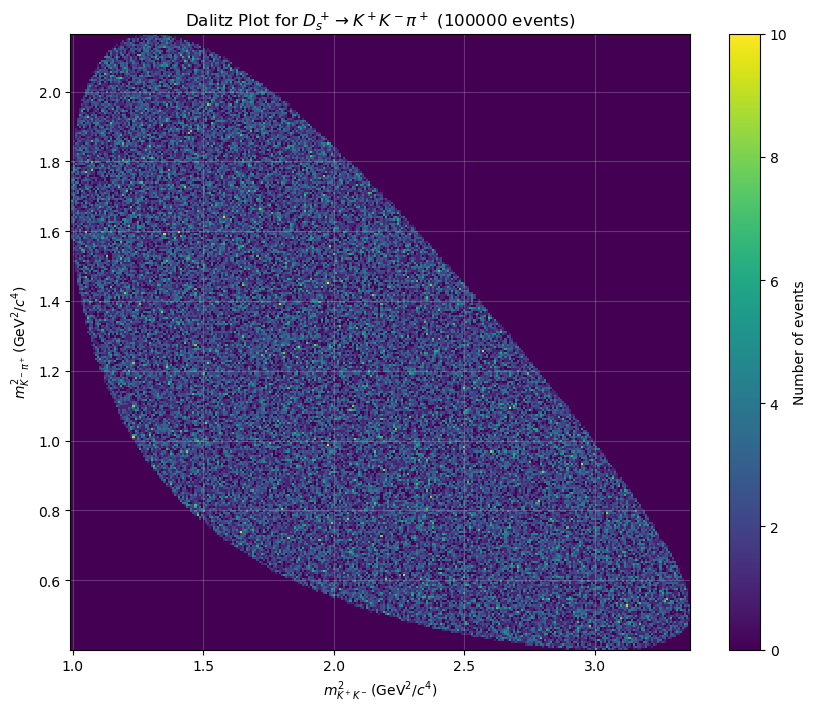

Time taken to generate 1,000,000 events: 0.6237 seconds


In [7]:
 import numpy as np
import matplotlib.pyplot as plt
import timeit

#Task 1

# generate_dalitz_events function
def generate_dalitz_events(n_events, m_dmeson=1.97, m_kaon=0.498, m_pion=0.135):
    m_D = m_dmeson
    m_a = m_kaon # K+
    m_b = m_kaon # K-
    m_c = m_pion # pi+
    m_D_sq = m_D**2
    m_a_sq = m_a**2
    m_b_sq = m_b**2
    m_c_sq = m_c**2

    m2ab_min_overall = (m_a + m_b)**2
    m2ab_max_overall = (m_D - m_c)**2
    m2bc_min_overall = (m_b + m_c)**2
    m2bc_max_overall = (m_D - m_a)**2
    m2ac_min_overall = (m_a + m_c)**2
    m2ac_max_overall = (m_D - m_b)**2

    accepted_m2ab_batches = []
    accepted_m2bc_batches = []
    total_accepted_events = 0

    epsilon = 1e-7 # Small epsilon for floating point comparisons

    batch_multiplier = 5
    min_batch_size = 10000

    while total_accepted_events < n_events:
        current_batch_size = max(min_batch_size, (n_events - total_accepted_events) * batch_multiplier)

        candidate_m2ab = np.random.uniform(m2ab_min_overall, m2ab_max_overall, int(current_batch_size))
        candidate_m2bc = np.random.uniform(m2bc_min_overall, m2bc_max_overall, int(current_batch_size))

        candidate_m2ac = m_D_sq + m_a_sq + m_b_sq + m_c_sq - candidate_m2ab - candidate_m2bc

        cond1 = (candidate_m2ac >= m2ac_min_overall - epsilon) & (candidate_m2ac <= m2ac_max_overall + epsilon)

        E_a = (m_D_sq + m_a_sq - candidate_m2bc) / (2 * m_D)
        E_b = (m_D_sq + m_b_sq - candidate_m2ac) / (2 * m_D)
        E_c = (m_D_sq + m_c_sq - candidate_m2ab) / (2 * m_D)

        cond2 = (E_a**2 >= m_a_sq - epsilon) & \
                (E_b**2 >= m_b_sq - epsilon) & \
                (E_c**2 >= m_c_sq - epsilon)

        p_a = np.sqrt(np.maximum(0, E_a**2 - m_a_sq))
        p_b = np.sqrt(np.maximum(0, E_b**2 - m_b_sq))
        p_c = np.sqrt(np.maximum(0, E_c**2 - m_c_sq))

        cond3 = (p_a + p_b >= p_c - epsilon) & \
                (p_a + p_c >= p_b - epsilon) & \
                (p_b + p_c >= p_a - epsilon)

        accepted_mask = cond1 & cond2 & cond3

        accepted_m2ab_batch = candidate_m2ab[accepted_mask]
        accepted_m2bc_batch = candidate_m2bc[accepted_mask]

        if len(accepted_m2ab_batch) > 0:
            accepted_m2ab_batches.append(accepted_m2ab_batch)
            accepted_m2bc_batches.append(accepted_m2bc_batch)
            total_accepted_events += len(accepted_m2ab_batch)

    final_m2ab = np.concatenate(accepted_m2ab_batches)[:n_events]
    final_m2bc = np.concatenate(accepted_m2bc_batches)[:n_events]

    return final_m2ab, final_m2bc


n_events_to_generate = 100000
m2ab_events, m2bc_events = generate_dalitz_events(n_events_to_generate)

# Plotting
plt.figure(figsize=(10, 8))
plt.hist2d(m2ab_events, m2bc_events, bins=(300, 300), cmap='viridis')
plt.colorbar(label='Number of events')
plt.xlabel(r'$m_{K^+ K^-}^2 \, (\mathrm{GeV}^2/c^4)$')
plt.ylabel(r'$m_{K^- \pi^+}^2 \, (\mathrm{GeV}^2/c^4)$')
plt.title(r'Dalitz Plot for $D_s^+ \rightarrow K^+ K^- \pi^+$' + f' ({n_events_to_generate} events)')
plt.grid(alpha=0.3)
plt.show()


execution_time = timeit.timeit(
    'generate_dalitz_events(1000000)', 
    globals=globals(), 
    number=1 
)
print(f"Time taken to generate 1,000,000 events: {execution_time:.4f} seconds")

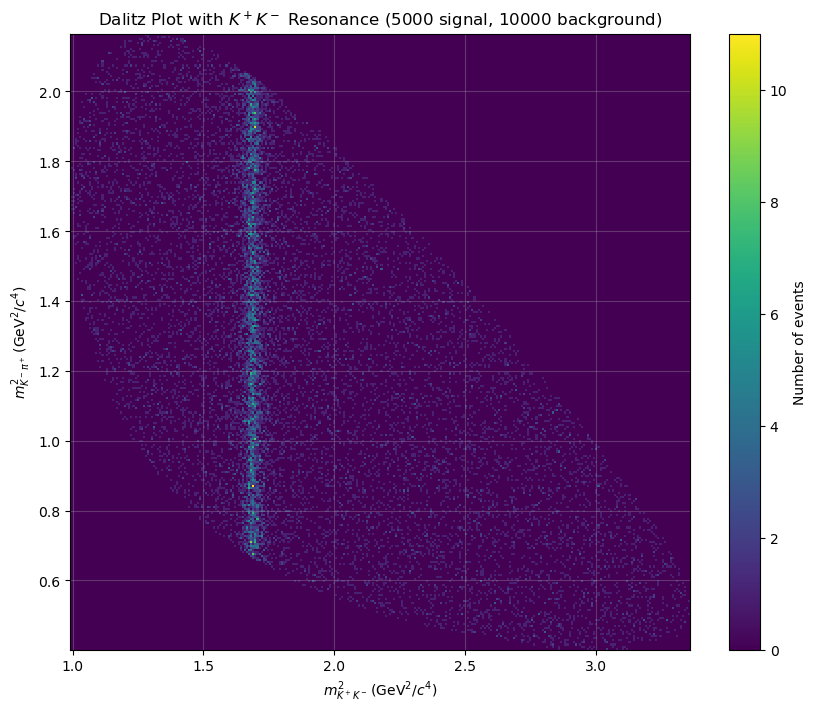

In [9]:
#Task 2

# --- Function for Breit-Wigner Squared ---
def breit_wigner_sq(m2, m_res, gamma_res):

    m_res_sq = m_res**2
    return 1.0 / ((m_res_sq - m2)**2 + (m_res * gamma_res)**2)

# Function to generate Breit-Wigner events
def generate_breit_wigner_events(n_events, m_res, gamma_res, dalitz_generator_func, m_dmeson, m_kaon, m_pion):

    generated_m2ab_bw = []
    generated_m2bc_bw = []

 
    max_bw_sq = breit_wigner_sq(m_res**2, m_res, gamma_res)


    oversampling_factor = 100

    while len(generated_m2ab_bw) < n_events:
        # Generate a batch of phase space events
        n_trials = int((n_events - len(generated_m2ab_bw)) * oversampling_factor)
        if n_trials < 1000: # reasonable batch size
            n_trials = 1000

        trial_m2ab, trial_m2bc = dalitz_generator_func(n_trials, m_dmeson, m_kaon, m_pion)


        bw_sq_vals = breit_wigner_sq(trial_m2ab, m_res, gamma_res)


        rands = np.random.uniform(0, max_bw_sq, n_trials)


        accepted_indices = np.where(bw_sq_vals >= rands)

        generated_m2ab_bw.extend(trial_m2ab[accepted_indices])
        generated_m2bc_bw.extend(trial_m2bc[accepted_indices])


    return np.array(generated_m2ab_bw[:n_events]), np.array(generated_m2bc_bw[:n_events])


# Parameters for resonance
m_res_kk = 1.3  # GeV/c^2
gamma_res_kk = 0.015  # GeV/c^2

# Particle masses
m_dmeson_val = 1.97
m_kaon_val = 0.498
m_pion_val = 0.135

# Number of events
n_resonance_events = 5000
n_background_events = 10000

# 1. Generate resonance events
m2ab_resonance, m2bc_resonance = generate_breit_wigner_events(
    n_resonance_events, m_res_kk, gamma_res_kk,
    generate_dalitz_events, m_dmeson_val, m_kaon_val, m_pion_val
)

# 2. Generate background events
m2ab_background, m2bc_background = generate_dalitz_events(
    n_background_events, m_dmeson_val, m_kaon_val, m_pion_val
)

# 3. Combine events
combined_m2ab = np.concatenate((m2ab_resonance, m2ab_background))
combined_m2bc = np.concatenate((m2bc_resonance, m2bc_background))


plt.figure(figsize=(10, 8))
plt.hist2d(combined_m2ab, combined_m2bc, bins=(300, 300), cmap='viridis')
plt.colorbar(label='Number of events')
plt.xlabel(r'$m_{K^+ K^-}^2 \, (\mathrm{GeV}^2/c^4)$')
plt.ylabel(r'$m_{K^- \pi^+}^2 \, (\mathrm{GeV}^2/c^4)$')
plt.title(f'Dalitz Plot with $K^+ K^-$ Resonance ({n_resonance_events} signal, {n_background_events} background)')
plt.grid(alpha=0.3)
plt.show()

Generating events for theta2 = 0 radians


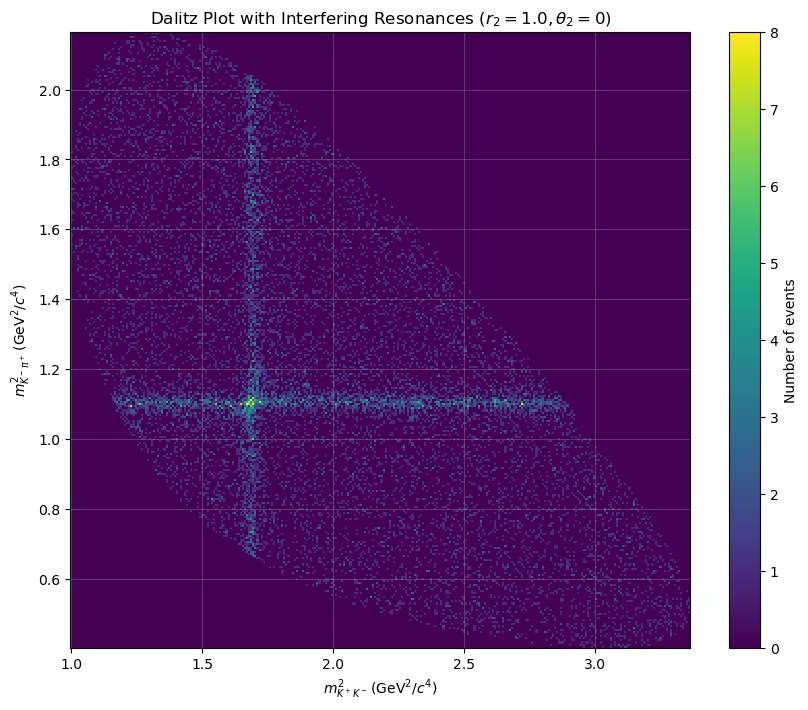

Generating events for theta2 = \pi radians


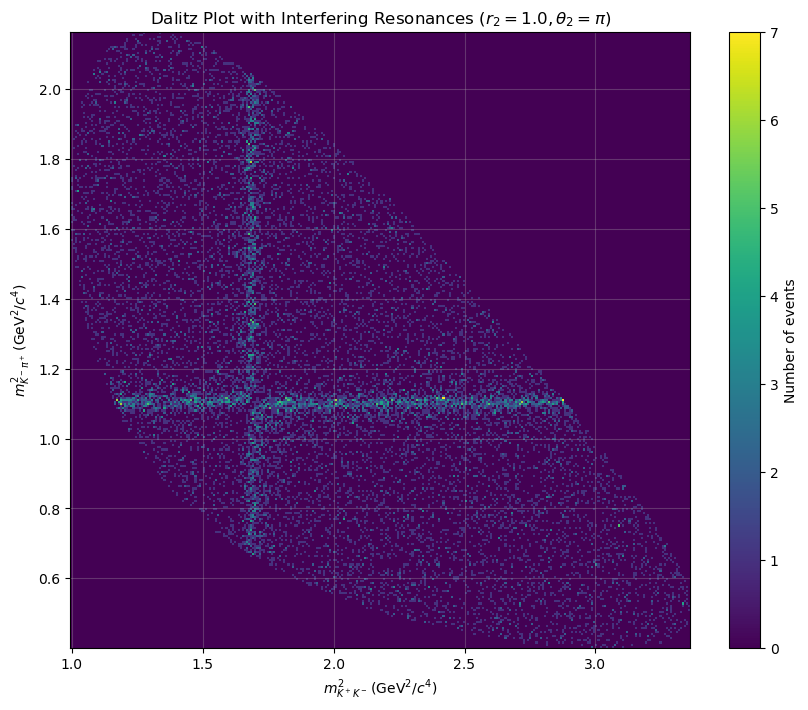

Generating events for theta2 = \pi/2 radians


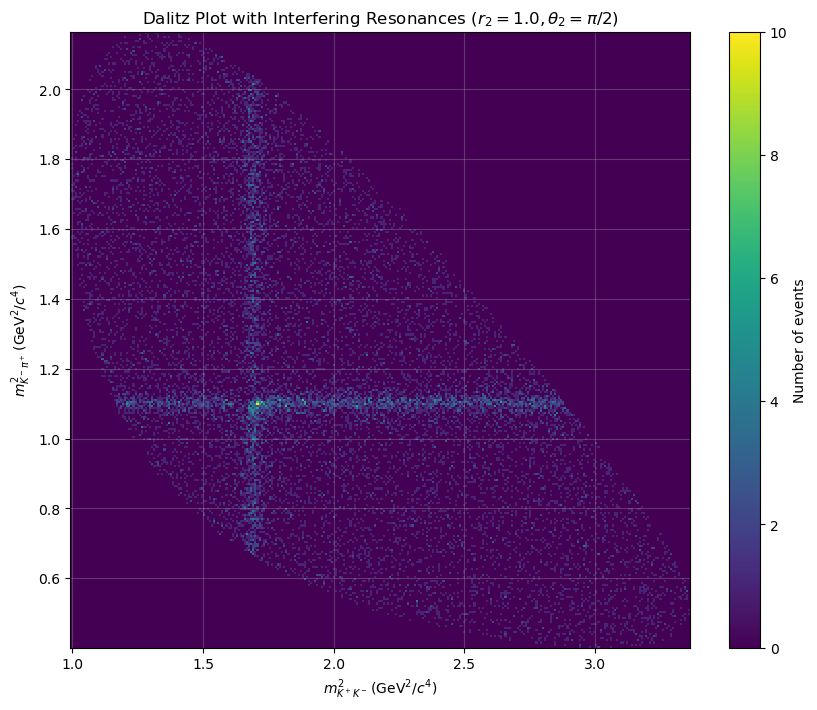

In [3]:
#Task 3

# --- Breit-Wigner Amplitude Function ---
def breit_wigner_amplitude(m2, m_res, gamma_res):

    m_res_sq = m_res**2
    return 1.0 / ((m_res_sq - m2) - 1j * (m_res * gamma_res))

# --- Total Amplitude Squared for Interfering Resonances ---
def total_amplitude_sq(m2ab, m2bc, m_res1, gamma_res1, m_res2, gamma_res2, r2, theta2):

    # Coefficient for Resonance 1 (K+K- system) - a1 = 1
    a1 = 1.0 + 0.0j

    # Coefficient for Resonance 2 (K-pi+ system) - a2 = r2 * (np.cos(theta2) + 1j * np.sin(theta2))
    a2 = r2 * (np.cos(theta2) + 1j * np.sin(theta2))

    # Amplitude for Resonance 1 (K+K- system, depends on m2ab)
    A1 = breit_wigner_amplitude(m2ab, m_res1, gamma_res1)

    # Amplitude for Resonance 2 (K-pi+ system, depends on m2bc)
    A2 = breit_wigner_amplitude(m2bc, m_res2, gamma_res2)

    # Total amplitude
    A_TOT = a1 * A1 + a2 * A2

    # Return the squared magnitude
    return np.abs(A_TOT)**2

# --- Function to generate interfering events using 2D rejection sampling ---
def generate_interfering_events(n_events, m_res1, gamma_res1, m_res2, gamma_res2, r2, theta2, dalitz_generator_func, m_dmeson, m_kaon, m_pion):

    generated_m2ab_int = []
    generated_m2bc_int = []


    n_sampling_for_max = 500000
    sample_m2ab, sample_m2bc = dalitz_generator_func(n_sampling_for_max, m_dmeson, m_kaon, m_pion)
    sample_amplitude_sq_vals = total_amplitude_sq(
        sample_m2ab, sample_m2bc, m_res1, gamma_res1, m_res2, gamma_res2, r2, theta2
    )

    max_amplitude_sq = np.max(sample_amplitude_sq_vals) * 1.1

    oversampling_factor = 200 

    while len(generated_m2ab_int) < n_events:
      
        n_trials = int((n_events - len(generated_m2ab_int)) * oversampling_factor)
        if n_trials < 5000: # minimum batch size
            n_trials = 5000

        trial_m2ab, trial_m2bc = dalitz_generator_func(n_trials, m_dmeson, m_kaon, m_pion)

        amplitude_sq_vals = total_amplitude_sq(
            trial_m2ab, trial_m2bc, m_res1, gamma_res1, m_res2, gamma_res2, r2, theta2
        )

      
        rands = np.random.uniform(0, max_amplitude_sq, n_trials)

        #
        accepted_indices = np.where(amplitude_sq_vals >= rands)

        generated_m2ab_int.extend(trial_m2ab[accepted_indices])
        generated_m2bc_int.extend(trial_m2bc[accepted_indices])

    
    return np.array(generated_m2ab_int[:n_events]), np.array(generated_m2bc_int[:n_events])

# Particle masses 
m_dmeson_val = 1.97
m_kaon_val = 0.498
m_pion_val = 0.135

# Resonance 1 parameters 
m_res1_kk = 1.3  # GeV/c^2
gamma_res1_kk = 0.015  # GeV/c^2

# Resonance 2 parameters 
m_res2_kpi = 1.05  # GeV/c^2
gamma_res2_kpi = 0.015  # GeV/c^2

# Interference parameter
r2_val = 1.0

# Number of events
n_signal_events = 5000
n_background_events = 10000


theta2_values = [0, np.pi, np.pi/2]
theta2_labels = [r'0', r'\pi', r'\pi/2'] 


for i, theta2 in enumerate(theta2_values):
    print(f"Generating events for theta2 = {theta2_labels[i]} radians")

    # 1. Generate interfering signal events
    m2ab_interfering, m2bc_interfering = generate_interfering_events(
        n_signal_events,
        m_res1_kk, gamma_res1_kk,
        m_res2_kpi, gamma_res2_kpi,
        r2_val, theta2,
        generate_dalitz_events, m_dmeson_val, m_kaon_val, m_pion_val
    )

    # 2. Generate background events
    m2ab_background, m2bc_background = generate_dalitz_events(
        n_background_events, m_dmeson_val, m_kaon_val, m_pion_val
    )

    # 3. Combine signal and background events
    combined_m2ab = np.concatenate((m2ab_interfering, m2ab_background))
    combined_m2bc = np.concatenate((m2bc_interfering, m2bc_background))


    plt.figure(figsize=(10, 8))
    plt.hist2d(combined_m2ab, combined_m2bc, bins=(300, 300), cmap='viridis')
    plt.colorbar(label='Number of events')
    plt.xlabel(r'$m_{K^+ K^-}^2 \, (\mathrm{GeV}^2/c^4)$')
    plt.ylabel(r'$m_{K^- \pi^+}^2 \, (\mathrm{GeV}^2/c^4)$')
    plt.title(r'Dalitz Plot with Interfering Resonances ($r_2=' + str(r2_val) + r', \theta_2=' + theta2_labels[i] + r'$)')
    plt.grid(alpha=0.3)
    plt.show()

In [5]:
from scipy.optimize import minimize

#Task 4a

# Particle masses and resonance parameters 
m_dmeson_val = 1.97
m_kaon_val = 0.498
m_pion_val = 0.135

m_res1_kk = 1.3  
gamma_res1_kk = 0.015
m_res2_kpi = 1.05  
gamma_res2_kpi = 0.015


n_signal_fit_events = 5000


r2_true = 1.0
theta2_true = np.pi

print(f"Generating {n_signal_fit_events} signal events for fitting with true r2={r2_true}, theta2={theta2_true/np.pi:.2f}*pi")

m2ab_data, m2bc_data = generate_interfering_events(
    n_signal_fit_events,
    m_res1_kk, gamma_res1_kk,
    m_res2_kpi, gamma_res2_kpi,
    r2_true, theta2_true,
    generate_dalitz_events, m_dmeson_val, m_kaon_val, m_pion_val
)
print(f"Generated {len(m2ab_data)} signal events.")


n_mc_integration_events = 50000 # As suggested by hint
m2ab_mc_integral, m2bc_mc_integral = generate_dalitz_events(
    n_mc_integration_events, m_dmeson_val, m_kaon_val, m_pion_val
)
print(f"Generated {n_mc_integration_events} MC events for normalization.")


def nll(params, m2ab_data, m2bc_data, m2ab_mc_integral, m2bc_mc_integral, m_res1, gamma_res1, m_res2, gamma_res2):
    r2_fit, theta2_fit = params

    theta2_fit = np.fmod(theta2_fit, 2 * np.pi)
    if theta2_fit < 0:
        theta2_fit += 2 * np.pi


    pdf_data_vals = total_amplitude_sq(m2ab_data, m2bc_data, m_res1, gamma_res1, m_res2, gamma_res2, r2_fit, theta2_fit)


    pdf_data_vals = np.maximum(pdf_data_vals, 1e-30)


    pdf_mc_vals = total_amplitude_sq(m2ab_mc_integral, m2bc_mc_integral, m_res1, gamma_res1, m_res2, gamma_res2, r2_fit, theta2_fit)


    pdf_mc_vals = np.maximum(pdf_mc_vals, 1e-30)


    log_norm_factor = np.log(np.mean(pdf_mc_vals))

    # Calculate the negative log-likelihood
    log_likelihood_sum = np.sum(np.log(pdf_data_vals))
    n_data = len(m2ab_data)

    neg_log_likelihood = -log_likelihood_sum + n_data * log_norm_factor

    return neg_log_likelihood


initial_r2 = 0.8
initial_theta2 = np.pi - 0.5 
initial_params = [initial_r2, initial_theta2]


bounds = [(0.01, 5.0), (0, 2 * np.pi)] 


fit_args = (
    m2ab_data, m2bc_data,
    m2ab_mc_integral, m2bc_mc_integral,
    m_res1_kk, gamma_res1_kk, m_res2_kpi, gamma_res2_kpi
)

print("Starting minimization...")

result = minimize(nll, initial_params, args=fit_args, method='L-BFGS-B', bounds=bounds, options={'disp': True})


fit_r2, fit_theta2 = result.x


fit_theta2 = np.fmod(fit_theta2, 2 * np.pi)
if fit_theta2 < 0:
    fit_theta2 += 2 * np.pi

print("\n--- Fit Results ---")
print(f"True r2: {r2_true:.3f}")
print(f"Fit r2: {fit_r2:.3f}")
print(f"True theta2: {theta2_true:.3f} radians ({theta2_true/np.pi:.3f} * pi)")
print(f"Fit theta2: {fit_theta2:.3f} radians ({fit_theta2/np.pi:.3f} * pi)")
print(f"Minimization successful: {result.success}")
print(f"Message: {result.message}")
print(f"Number of function evaluations: {result.nfev}")

Generating 5000 signal events for fitting with true r2=1.0, theta2=1.00*pi
Generated 5000 signal events.
Generated 50000 MC events for normalization.
Starting minimization...
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -7.52821D+03    |proj g|=  4.20000D+00

At iterate    1    f= -7.67154D+03    |proj g|=  3.44030D+00

At iterate    2    f= -7.67410D+03    |proj g|=  3.41971D+00

At iterate    3    f= -7.68302D+03    |proj g|=  4.00362D+00

At iterate    4    f= -7.68377D+03    |proj g|=  3.99514D+00

At iterate    5    f= -7.68387D+03    |proj g|=  7.27960D-01

At iterate    6    f= -7.68387D+03    |proj g|=  2.00089D-02

--- Fit Results ---
True r2: 1.000
Fit r2: 1.010
True theta2: 3.142 radians (1.000 * pi)
Fit theta2: 3.085 radians (0.982 * pi)
Minimization successful: True
Message: CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH
Number o

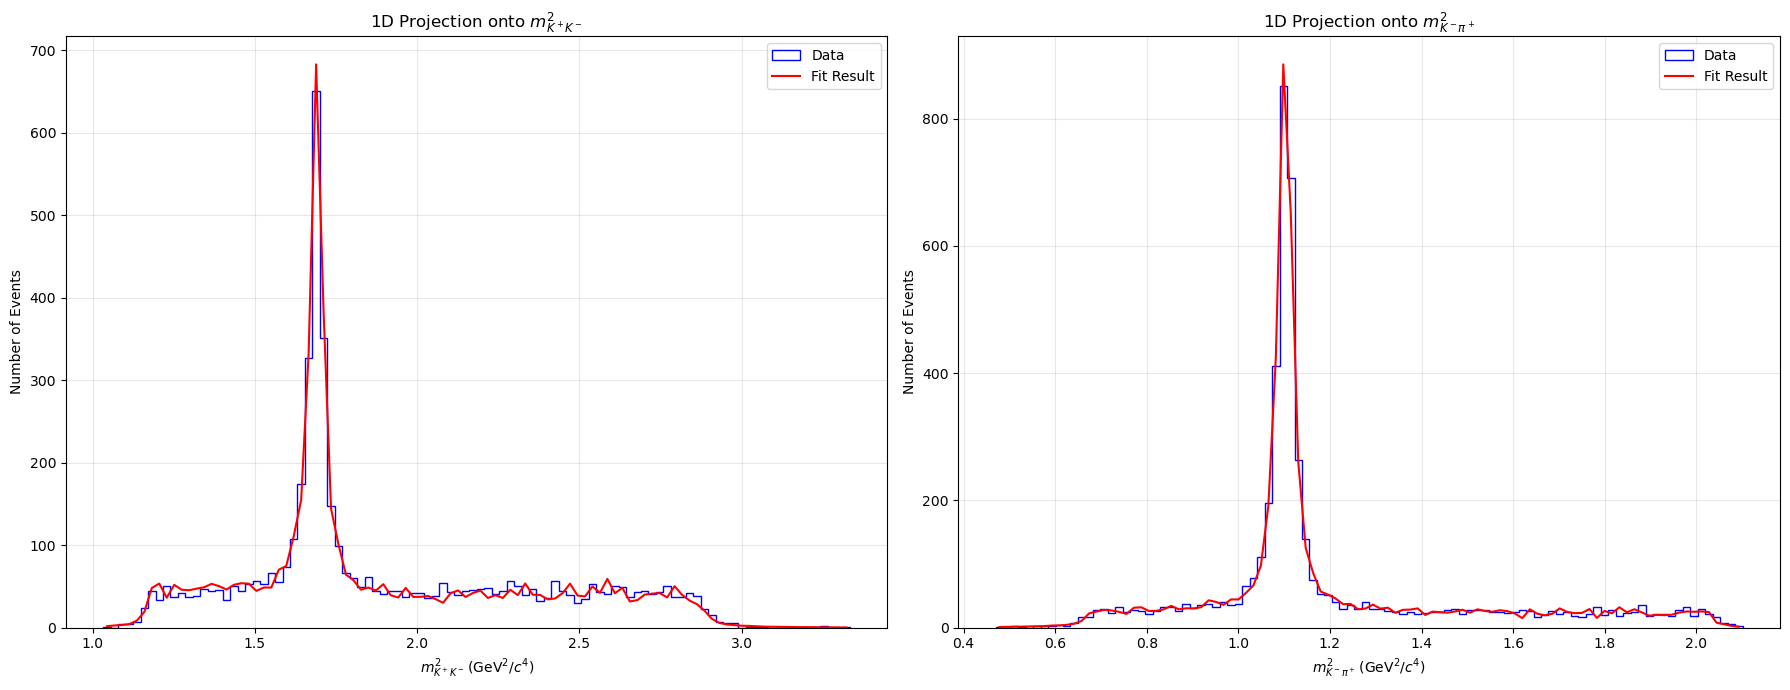

In [6]:
#Task 4b

# Number of bins for 1D projections
n_bins_1d = 100

# Create figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 7))


pdf_mc_vals_fitted = total_amplitude_sq(m2ab_mc_integral, m2bc_mc_integral,
                                       m_res1_kk, gamma_res1_kk, m_res2_kpi, gamma_res2_kpi,
                                       fit_r2, fit_theta2)
pdf_mc_vals_fitted = np.maximum(pdf_mc_vals_fitted, 1e-30) # Ensure no zeros for log, etc.


normalization_constant_fit = np.mean(pdf_mc_vals_fitted)


weights_for_projection = pdf_mc_vals_fitted / normalization_constant_fit



ax = axes[0]
# Plot data histogram
hist_data_m2ab, bin_edges_m2ab, _ = ax.hist(m2ab_data, bins=n_bins_1d, histtype='step', label='Data', color='blue', density=False)
bin_centers_m2ab = (bin_edges_m2ab[:-1] + bin_edges_m2ab[1:]) / 2

# Plot fitted model projection
hist_fit_m2ab, _ = np.histogram(m2ab_mc_integral, bins=bin_edges_m2ab, weights=weights_for_projection)

hist_fit_m2ab_scaled = hist_fit_m2ab * (n_signal_fit_events / n_mc_integration_events)
ax.plot(bin_centers_m2ab, hist_fit_m2ab_scaled, color='red', linestyle='-', label='Fit Result')

ax.set_xlabel(r'$m_{K^+ K^-}^2 \, (\mathrm{GeV}^2/c^4)$')
ax.set_ylabel('Number of Events')
ax.set_title(r'1D Projection onto $m_{K^+ K^-}^2$')
ax.legend()
ax.grid(alpha=0.3)



ax = axes[1]
# Plot data histogram
hist_data_m2bc, bin_edges_m2bc, _ = ax.hist(m2bc_data, bins=n_bins_1d, histtype='step', label='Data', color='blue', density=False)
bin_centers_m2bc = (bin_edges_m2bc[:-1] + bin_edges_m2bc[1:]) / 2

# Plot fitted model projection
hist_fit_m2bc, _ = np.histogram(m2bc_mc_integral, bins=bin_edges_m2bc, weights=weights_for_projection)
# Scale the fitted histogram to match the total number of data events
hist_fit_m2bc_scaled = hist_fit_m2bc * (n_signal_fit_events / n_mc_integration_events)
ax.plot(bin_centers_m2bc, hist_fit_m2bc_scaled, color='red', linestyle='-', label='Fit Result')

ax.set_xlabel(r'$m_{K^- \pi^+}^2 \, (\mathrm{GeV}^2/c^4)$')
ax.set_ylabel('Number of Events')
ax.set_title(r'1D Projection onto $m_{K^- \pi^+}^2$')
ax.legend()
ax.grid(alpha=0.3)

plt.tight_layout()
plt.show()